<b>*Disclaimer - this section is a work in progress</b>
<br></br>

# note to self

data types
descriptive statistics - mean, mode, median, std dev, -> categorical data uses frequency distributions and bar charts
make graphs! histograms, box plots, scatter plots, heatmaps
correlation analysis - correlation matrices, heat maps, scatterplots
hypothesis generation - refine hypotheses and research questions
identify outliers
report and discuss findings!!!!

# ncaahoopR

### 2021-22 season

In [11]:
nova2122 <- read.csv('./data/modified_data/nova2122.csv')

library(tidyverse)

shooter,shots,field_goal_percentage
<chr>,<int>,<dbl>
Justin Moore,574,0.4721254
Collin Gillespie,549,0.5336976
Jermaine Samuels,439,0.5535308
Caleb Daniels,356,0.5056180
Eric Dixon,340,0.5794118
Brandon Slater,308,0.5876623
Chris Arcidiacono,69,0.4927536
Jordan Longino,57,0.4210526
Bryan Antoine,46,0.3043478


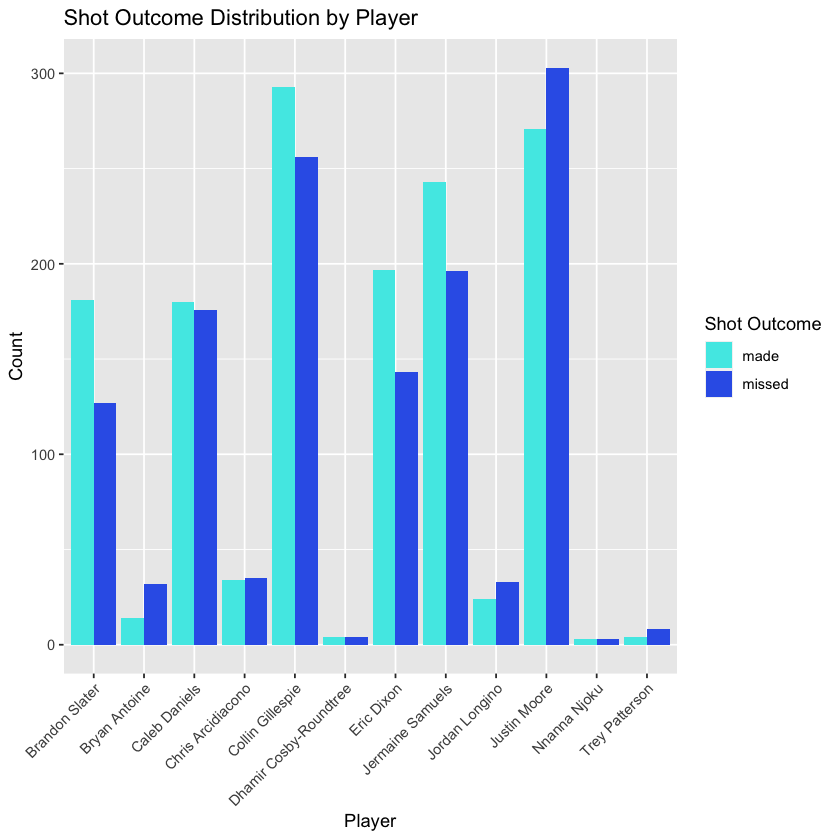

In [12]:
# Create a ggplot for shot outcome distribution by villanova players
nova_players <- nova2122 %>% filter(shooter_team == "Villanova")

ggplot(nova_players, aes(x = shooter, fill = shot_outcome)) +
  geom_bar(position = "dodge") +
  labs(title = "Shot Outcome Distribution by Player", x = "Player", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("missed" = "#3464e9", "made" = "#4de9e6")) +
  guides(fill = guide_legend(title = "Shot Outcome"))

# Calculate the mean of shot_outcome for each player
mean_and_count_data <- nova_players %>%
  group_by(shooter) %>%
   summarize(
    shots = n(),
    field_goal_percentage = mean(ifelse(shot_outcome_numeric == -1, 0, shot_outcome_numeric), na.rm = TRUE)
  ) %>%
  arrange(-shots) 

mean_and_count_data

In [13]:
# Create lag variables within each shooter and game_id group
nova2122 <- nova2122 %>%
  arrange(shooter, game_id, play_id) %>%  # Arrange the data by shooter, game_id, and play_id
  group_by(shooter, game_id) %>%
  mutate(
    lag1 = lag(shot_outcome_numeric, order_by = play_id),
    lag2 = lag(shot_outcome_numeric, order_by = play_id, n = 2),
    lag3 = lag(shot_outcome_numeric, order_by = play_id, n = 3),
    lag4 = lag(shot_outcome_numeric, order_by = play_id, n = 4),
    lag5 = lag(shot_outcome_numeric, order_by = play_id, n = 5),
    lag6 = lag(shot_outcome_numeric, order_by = play_id, n = 6)) %>%
    ungroup() %>%
    arrange(game_id, play_id)

# View the updated data with lag variables
head(nova2122)

game_id,play_id,half,shooter,shot_outcome,shooter_team,shot_outcome_numeric,shot_sequence,previous_shots,lag1,lag2,lag3,lag4,lag5,lag6
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
401365747,4,1,Justin Moore,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401365747,7,1,Clifton Moore,missed,La Salle,-1,-1,0,NA,NA,NA,NA,NA,NA
401365747,11,1,Clifton Moore,missed,La Salle,-1,-2,-1,-1,NA,NA,NA,NA,NA
401365747,13,1,Eric Dixon,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401365747,16,1,Collin Gillespie,made,Villanova,1,1,0,NA,NA,NA,NA,NA,NA
401365747,18,1,Eric Dixon,made,Villanova,1,1,-1,-1,NA,NA,NA,NA,NA


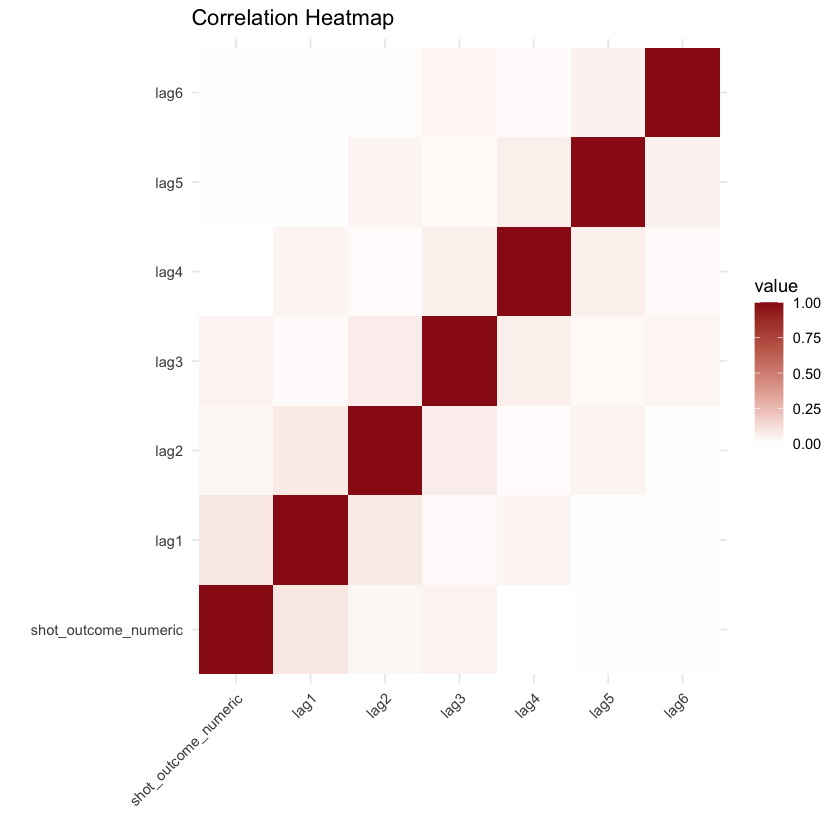

In [15]:
# Calculate the correlation matrix
cor_matrix <- cor(nova2122[, c("shot_outcome_numeric", "lag1", "lag2", "lag3", "lag4", "lag5", "lag6")], use = "pairwise.complete.obs")

library(reshape2)
cor_data <- melt(cor_matrix)

ggplot(cor_data, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#f69696", high = "#9a1717", midpoint = 0) +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### 2019-20 season

In [2]:
nova1920 <- read.csv('./data/modified_data/nova1920.csv')

shooter,shots,field_goal_percentage
<chr>,<int>,<dbl>
Collin Gillespie,491,0.4969450
Saddiq Bey,458,0.5349345
Justin Moore,355,0.4647887
Jeremiah Robinson-Earl,347,0.5533141
Jermaine Samuels,334,0.5419162
Cole Swider,171,0.4561404
Brandon Slater,68,0.3823529
Dhamir Cosby-Roundtree,36,0.6666667
Bryan Antoine,25,0.3600000


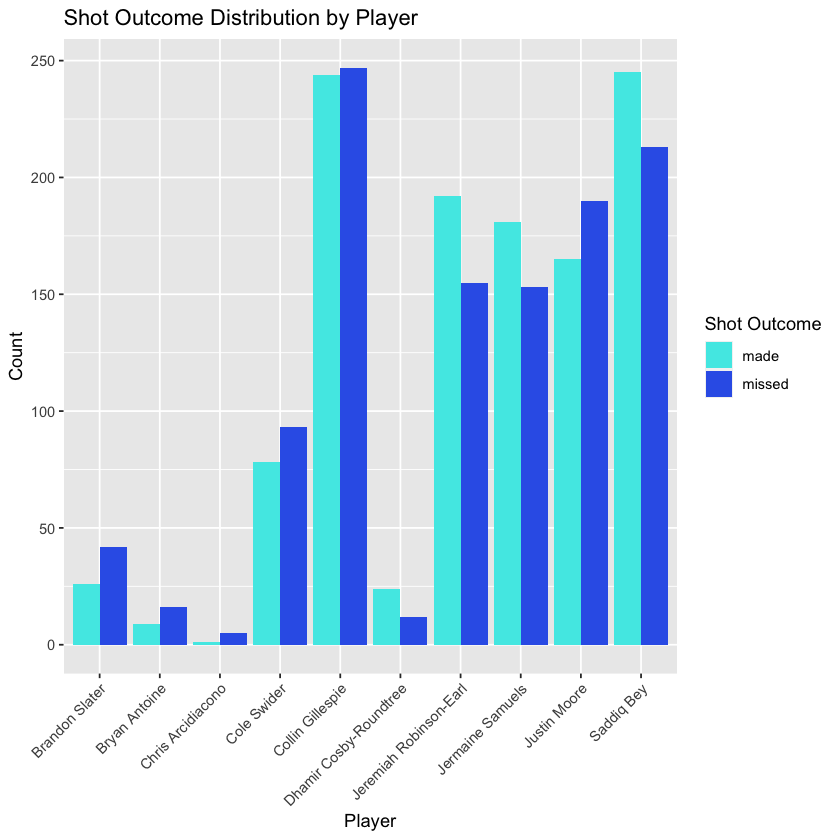

In [3]:
# Create a ggplot for shot outcome distribution by villanova players
nova_players <- nova1920 %>% filter(shooter_team == "Villanova")

ggplot(nova_players, aes(x = shooter, fill = shot_outcome)) +
  geom_bar(position = "dodge") +
  labs(title = "Shot Outcome Distribution by Player", x = "Player", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = c("missed" = "#3464e9", "made" = "#4de9e6")) +
  guides(fill = guide_legend(title = "Shot Outcome"))

# Calculate the mean of shot_outcome for each player
mean_and_count_data <- nova_players %>%
  group_by(shooter) %>%
   summarize(
    shots = n(),
    field_goal_percentage = mean(ifelse(shot_outcome_numeric == -1, 0, shot_outcome_numeric), na.rm = TRUE)
  ) %>%
  arrange(-shots) 

mean_and_count_data

In [6]:
# Create lag variables within each shooter and game_id group
nova1920 <- nova1920 %>%
  arrange(shooter, game_id, play_id) %>%  # Arrange the data by shooter, game_id, and play_id
  group_by(shooter, game_id) %>%
  mutate(
    lag1 = lag(shot_outcome_numeric, order_by = play_id),
    lag2 = lag(shot_outcome_numeric, order_by = play_id, n = 2),
    lag3 = lag(shot_outcome_numeric, order_by = play_id, n = 3),
    lag4 = lag(shot_outcome_numeric, order_by = play_id, n = 4),
    lag5 = lag(shot_outcome_numeric, order_by = play_id, n = 5),
    lag6 = lag(shot_outcome_numeric, order_by = play_id, n = 6)) %>%
    ungroup() %>%
    arrange(game_id, play_id)

# View the updated data with lag variables
head(nova1920)

game_id,play_id,half,shooter,shot_outcome,shooter_team,shot_outcome_numeric,shot_sequence,previous_shots,lag1,lag2,lag3,lag4,lag5,lag6
<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
401166061,2,1,Duane Washington Jr.,made,Ohio State,1,1,0,NA,NA,NA,NA,NA,NA
401166061,4,1,Saddiq Bey,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401166061,6,1,Saddiq Bey,missed,Villanova,-1,-2,-1,-1,NA,NA,NA,NA,NA
401166061,8,1,Duane Washington Jr.,made,Ohio State,1,2,1,1,NA,NA,NA,NA,NA
401166061,9,1,Collin Gillespie,missed,Villanova,-1,-1,0,NA,NA,NA,NA,NA,NA
401166061,11,1,CJ Walker,made,Ohio State,1,1,0,NA,NA,NA,NA,NA,NA



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




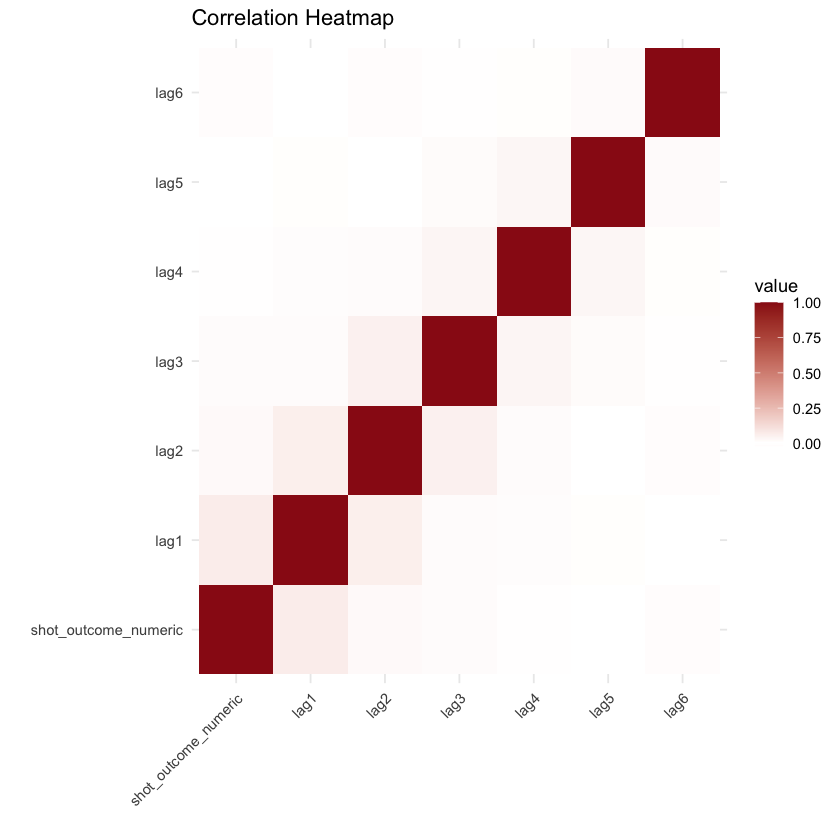

In [7]:
# Calculate the correlation matrix
cor_matrix <- cor(nova1920[, c("shot_outcome_numeric", "lag1", "lag2", "lag3", "lag4", "lag5", "lag6")], use = "pairwise.complete.obs")

library(reshape2)
cor_data <- melt(cor_matrix)

ggplot(cor_data, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#f69696", high = "#9a1717", midpoint = 0) +
  labs(title = "Correlation Heatmap", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
# i want to create a histogram of games per season with shots for each player and made shots for each player

# i want to do something with my lag variable

# Text Data - Reddit or News APT

# Individual Player Data

In [1]:
#let's import some libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aaronjudge = pd.read_csv('./data/modified_data/aaronjudge.csv')

In [3]:
aaronjudge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              100 non-null    object 
 1   Team              100 non-null    object 
 2   Opp               100 non-null    object 
 3   BO                100 non-null    int64  
 4   Pos               100 non-null    object 
 5   PA                100 non-null    float64
 6   H                 100 non-null    int64  
 7   2B                100 non-null    int64  
 8   3B                100 non-null    int64  
 9   HR                100 non-null    int64  
 10  R                 100 non-null    int64  
 11  RBI               100 non-null    int64  
 12  SB                100 non-null    int64  
 13  CS                100 non-null    int64  
 14  BB%               100 non-null    float64
 15  K%                100 non-null    object 
 16  ISO               100 non-null    float64
 17

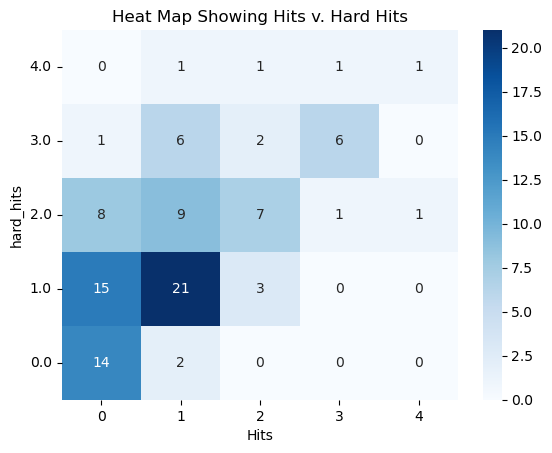

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming aaronjudge is your DataFrame
# Create a pivot table to count the observations
pivot_table = aaronjudge.pivot_table(index='hard_hits', columns='H', aggfunc='size', fill_value=0)

# Create the heatmap
ax = sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt="d")

# Customize the y-axis to start at 0 and increase as you go up
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()

# Customize the plot if needed
plt.title("Heat Map Showing Hits v. Hard Hits")
plt.xlabel("Hits")
plt.ylabel("hard_hits")

plt.show()

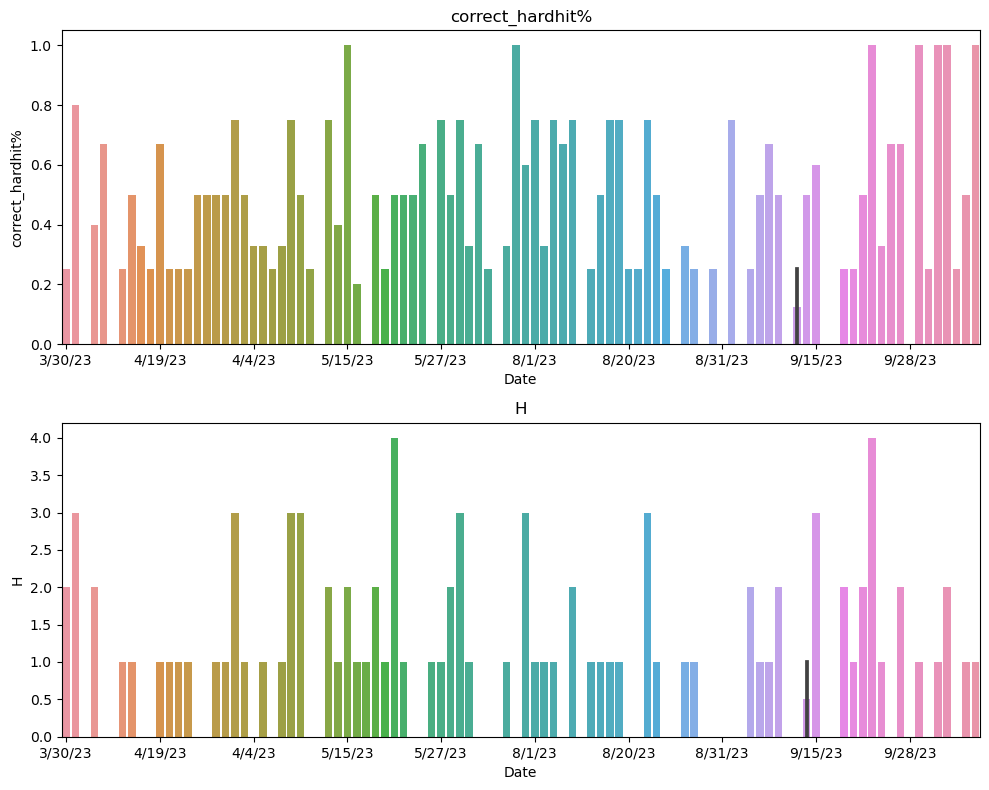

In [8]:
# Sort the DataFrame by Date in ascending order
aaronjudge = aaronjudge.sort_values(by='Date')

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# First subplot - correct_hardhit%
sns.barplot(data=aaronjudge, y='correct_hardhit%', x='Date', ax=axes[0])
axes[0].set_title("correct_hardhit%")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("correct_hardhit%")
# Get the x-axis tick positions
x_ticks = axes[0].get_xticks()

# Show every 10th label
visible_ticks = x_ticks[::10]

# Set the x-axis labels
axes[0].set_xticks(visible_ticks)

# Second subplot - H
sns.barplot(data=aaronjudge, y='H', x='Date', ax=axes[1])
axes[1].set_title("H")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("H")
# Get the x-axis tick positions
x_ticks = axes[1].get_xticks()

# Show every 10th label
visible_ticks = x_ticks[::10]

# Set the x-axis labels
axes[1].set_xticks(visible_ticks)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the combined figure
plt.show()


# Hypothesis Refinement

yoda data master!